In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb 
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('all_data.csv', index_col=0)

In [3]:
data

,acc_x,acc_y,acc_z,rot_x,rot_y,rot_z,activity
0,-0.000140,-0.031053,0.016221,-0.002630,-0.000127,0.000303,Sitting
1,-0.000414,-0.049427,0.023594,-0.002630,-0.003322,-0.000762,Sitting
2,-0.017128,-0.041670,0.018950,-0.000499,-0.006518,-0.000762,Sitting
3,-0.009995,-0.026839,-0.013873,0.001631,-0.005453,-0.000762,Sitting
4,-0.000639,-0.033592,-0.001403,0.000566,-0.005453,0.000303,Sitting
...,...,...,...,...,...,...,...
2177610,3.124783,8.580249,1.343975,0.270950,0.427377,0.745399,Walking
2177611,3.124783,8.580249,1.343975,0.270950,0.427377,0.745399,Walking
2177612,3.124783,8.580249,1.343975,0.270950,0.427377,0.745399,Walking
2177613,3.124783,8.580249,1.343975,0.270950,0.427377,0.745399,Walking


<AxesSubplot:xlabel='acc_x', ylabel='acc_y'>

C:\Users\fatima\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


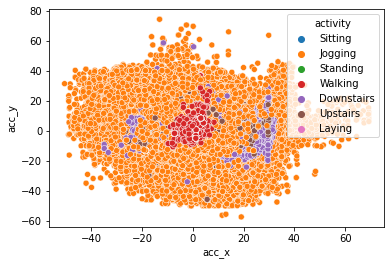

In [7]:
sb.scatterplot(x=data['acc_x'] , y=data['acc_y'] , hue=data['activity'])

<AxesSubplot:>

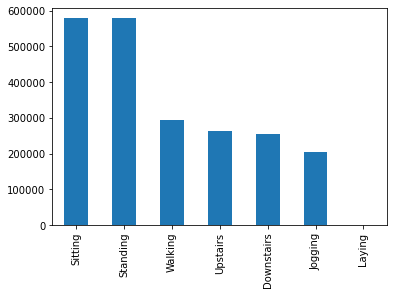

In [9]:
data.activity.value_counts().plot(kind='bar')

In [4]:
indexes = data[data.activity == 'Standing'].sample(frac=0.4).index.tolist()
indexes+=data[data.activity == 'Sitting'].sample(frac=0.4).index.tolist()
indexes+=data[data.activity == 'Laying'].index.tolist()

indexes.sort()
indexes

[1,
 5,
 7,
 9,
 10,
 13,
 17,
 18,
 20,
 22,
 25,
 27,
 28,
 29,
 30,
 41,
 42,
 44,
 47,
 52,
 55,
 57,
 60,
 62,
 64,
 67,
 70,
 71,
 72,
 75,
 78,
 80,
 81,
 85,
 87,
 88,
 90,
 91,
 92,
 100,
 102,
 103,
 105,
 108,
 109,
 112,
 113,
 114,
 115,
 119,
 123,
 124,
 126,
 127,
 129,
 131,
 133,
 140,
 142,
 146,
 151,
 154,
 158,
 161,
 162,
 165,
 167,
 173,
 174,
 176,
 182,
 183,
 196,
 197,
 198,
 201,
 203,
 213,
 218,
 219,
 220,
 222,
 223,
 226,
 227,
 228,
 230,
 231,
 232,
 233,
 238,
 241,
 243,
 245,
 246,
 248,
 250,
 251,
 252,
 256,
 258,
 259,
 267,
 271,
 273,
 274,
 275,
 277,
 282,
 287,
 290,
 292,
 293,
 295,
 301,
 306,
 308,
 311,
 312,
 319,
 320,
 322,
 324,
 327,
 328,
 331,
 333,
 337,
 338,
 339,
 340,
 341,
 342,
 346,
 347,
 348,
 350,
 354,
 355,
 356,
 357,
 358,
 367,
 369,
 370,
 371,
 374,
 375,
 376,
 377,
 378,
 379,
 382,
 384,
 385,
 389,
 391,
 401,
 402,
 406,
 407,
 411,
 413,
 416,
 417,
 419,
 423,
 424,
 434,
 435,
 436,
 441,
 444,
 446,

In [5]:
d=data.drop(index=indexes)

In [6]:
d=d.reset_index()

<AxesSubplot:>

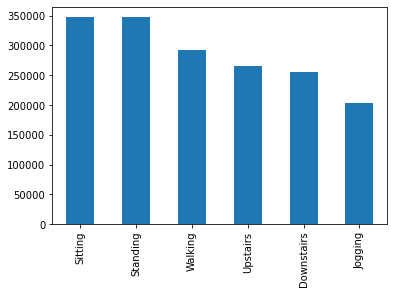

In [7]:
d.activity.value_counts().plot(kind='bar')

In [8]:
d.columns

Index(['index', 'acc_x', 'acc_y', 'acc_z', 'rot_x', 'rot_y', 'rot_z',
       'activity'],
      dtype='object')

In [ ]:
d.to_csv('newdata6features.csv')

In [9]:
df=d.sample(frac=1).reset_index(drop=True)[0:500000]

In [10]:
x=df[['acc_x', 'acc_y', 'acc_z', 'rot_x', 'rot_y', 'rot_z']]
y=df[['activity']]

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
y.head()

,activity
0,4
1,0
2,2
3,3
4,4


In [12]:
y.activity.unique()

array([4, 0, 2, 3, 1, 5])

In [13]:
y=y.values.reshape(y.shape[0])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30 , random_state=100)

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:

model=svm.SVC()
model.fit(X_train,y_train)


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
ypred

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score( y_test ,ypred )
acc

- 0.52 accuracy  100 000 rows sample